In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import sklearn.datasets
from sklearn.metrics import accuracy_score
import warnings
sns.set()

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

# The Iris Dataset

In [2]:
df = pd.read_csv('data/iris_unsupervised.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


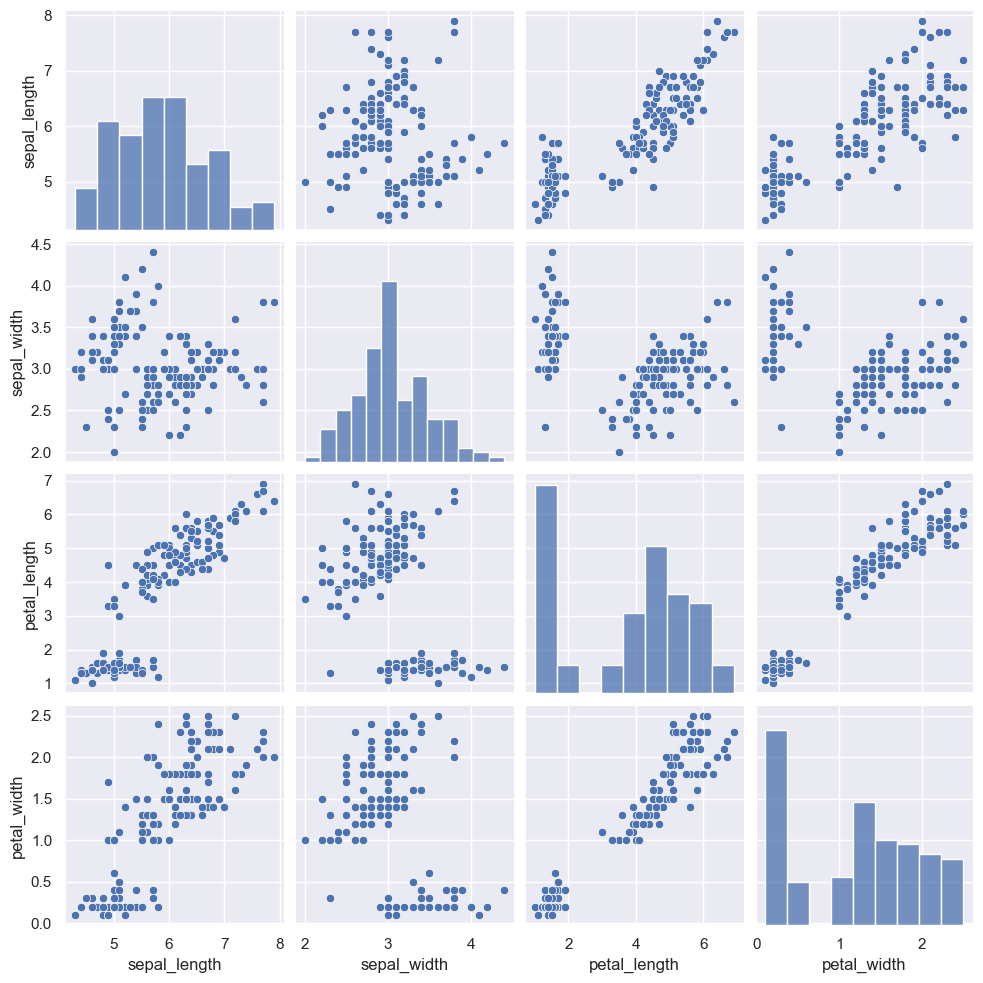

In [3]:
#  We can use pairplot to plot scatterplots of everything with everything else.  We put hisograms on the diagonal
sns.pairplot(df)

<Axes: xlabel='petal_width', ylabel='petal_length'>

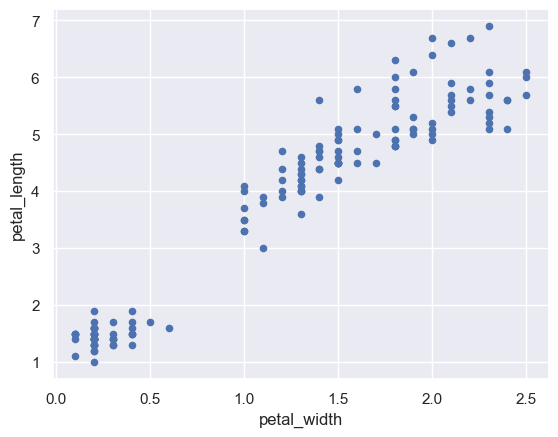

In [12]:
df.plot(kind='scatter', x='petal_width', y='petal_length')

## K-Means

In [6]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


df.head()
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [13]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',]

kmeans = KMeans(n_clusters=5, random_state=None)


kmeans.fit(df[features])

df['cluster'] = kmeans.predict(df[features])


<Axes: xlabel='petal_width', ylabel='petal_length'>

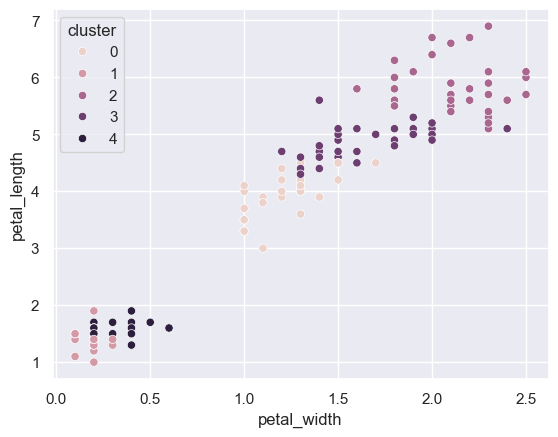

In [10]:
# df.plot(kind='scatter', x='petal_width', y='petal_length', color='cluster')
sns.scatterplot(df, x='petal_width', y='petal_length', hue='cluster')

##### STOP HERE IN ACTUAL CLASS, HOWEVER... 
# If you want more... 
##### BELOW IS ADDITIONAL STUFF TO VALIDATE YOUR CLUSTERS WHEN YOU HAVE LABELS. 

# Now we have clusters, lets see if they correspond to any of the know groups/classes/labels. 

<Axes: title={'center': 'Y-Predicted'}, xlabel='petal_width', ylabel='Count'>

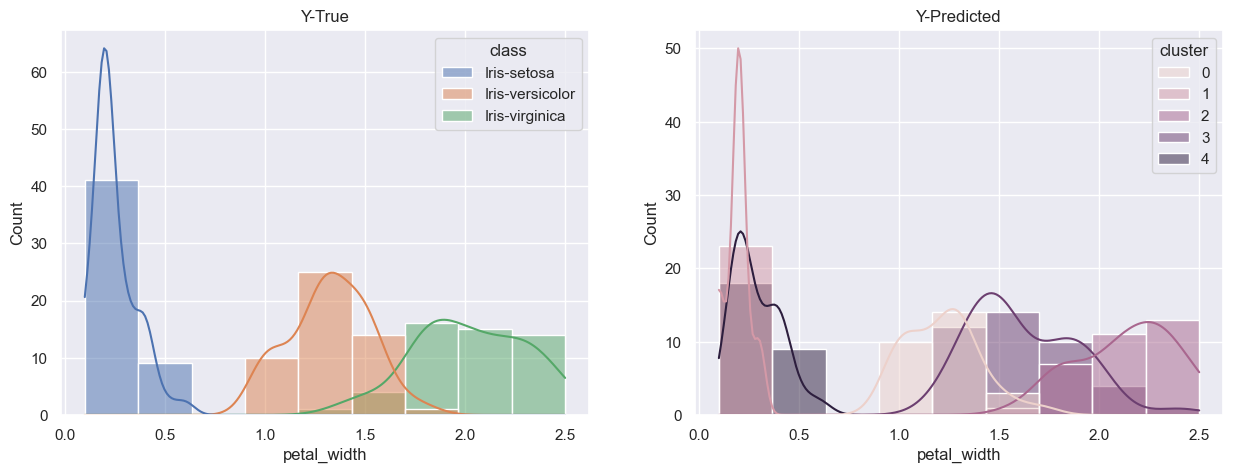

In [11]:
import matplotlib.pyplot as plt

df = pd.read_csv('data/iris.csv')
df['cluster'] = kmeans.predict(df[features])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].set_title('Y-True')
sns.histplot(df, x='petal_width', hue='class', kde=True, ax=axes[0])

axes[1].set_title('Y-Predicted')
sns.histplot(df, x='petal_width', hue='cluster', kde=True, ax=axes[1])

In [24]:
cluster_to_class_map = {
    1: 'Iris-setosa',
    0: 'Iris-versicolor',
    2: 'Iris-virginica'
}

df['y_pred_label'] = df.cluster.map(cluster_to_class_map)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,cluster,y_pred_label
0,5.1,3.5,1.4,0.2,Iris-setosa,1,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,1,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,1,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,1,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,1,Iris-setosa


In [25]:
y_true = df['class']
y_pred = df['y_pred_label']

accuracy_score(y_true=y_true, y_pred=y_pred)

0.8933333333333333

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

y_true = df['class']
y_pred = df['y_pred_label']

print(classification_report(y_true, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.77      0.96      0.86        50
 Iris-virginica       0.95      0.72      0.82        50

       accuracy                           0.89       150
      macro avg       0.91      0.89      0.89       150
   weighted avg       0.91      0.89      0.89       150



In [27]:
print(df['class'].value_counts())
print(df.y_pred_label.value_counts())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
y_pred_label
Iris-versicolor    62
Iris-setosa        50
Iris-virginica     38
Name: count, dtype: int64


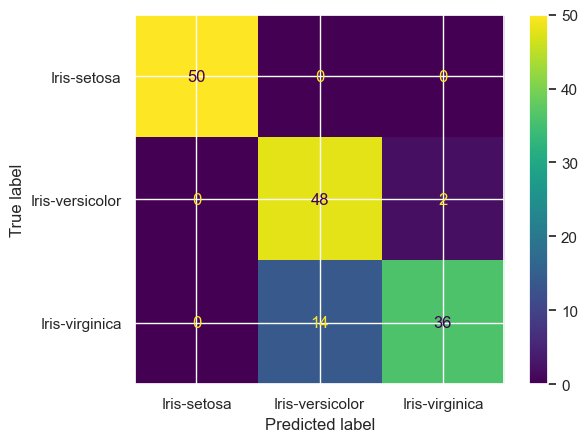

In [28]:
ConfusionMatrixDisplay.from_predictions(y_true, y_pred)